# Pymaceuticals Inc.
---

### Analysis

Based on the scatter plot analysis, it appears that there is a correlation between mouse weight and tumor volume for mice treated with Capomulin. In other words, as the weight of the mouse increases, there is a tendency for the tumor volume to also increase. This suggests that there may be a relationship between mouse weight and tumor growth in response to Capomulin treatment.
It is evident that Capomulin and Ramicane stand out as the two most effective drugs in minimizing tumor size. These two treatments consistently lead to smaller tumor volumes compared to other drugs.
Ramicane appears to be the most potent drug, as it boasts the lowest average final tumor volum. Conversely, Infubinol shows the least favorable outcomes, as it shows the highest average final tumor volume.



In [346]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import sklearn.datasets as dta
import pandas as pd
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
mouse_data_complete.head()

# Display the data table for preview
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [347]:
# Checking the number of mice.
number_mice = mouse_data_complete['Mouse ID'].value_counts()
number_mice

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [348]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   2
                                                        5          47.570392           0                   1
                                                                   48.786801           0                   1
                                                        10         49.880528           0                   1
                                                                   51.745156           0                   1
                                                        15         51.325852           1                   1
                                                                   53.442020           0                   1
                                                        20         54.657650           1                   1
                        

In [349]:
# Optional: Get all the data for the duplicate mouse ID. 
#ask for difference in class **
mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [350]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'] != "g989"]
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [351]:
# Checking the number of mice in the clean DataFrame.

number_mice = clean_mouse_data['Mouse ID'].nunique()
number_mice


248

## Summary Statistics

In [352]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
meanbyregimen = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
meanbyregimen
medianbyregimen = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
medianbyregimen
variancebyregimen = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variancebyregimen
svbyregimen = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
svbyregimen
sembyregimen = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sembyregimen
# Assemble the resulting series into a single summary DataFrame.

statistic_summary = pd.DataFrame({
    "Mean Tumor Volume": meanbyregimen,
    "Median Tumor Volume": medianbyregimen,
    "Tumor Volume Variance": variancebyregimen,
    "Tumor Volume Std. Dev.": svbyregimen,
    "Tumor Volume Std. Err.": sembyregimen})
statistic_summary




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [353]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

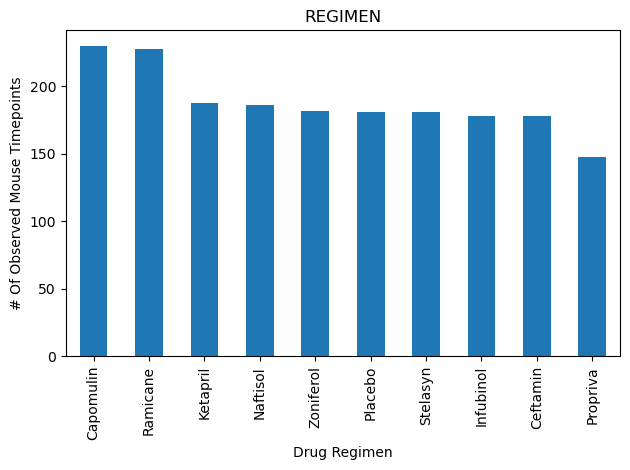

In [354]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Mouse_bar_chart = clean_mouse_data['Drug Regimen'].value_counts()
Mouse_bar_chart.plot(kind='bar', title="REGIMEN")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


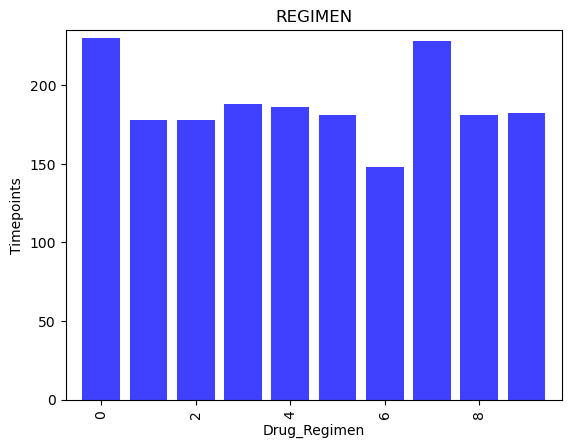

In [355]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Drug_Regimen = np.array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
Timepoints = np.array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

x_axis = np.arange(0, len(Drug_Regimen))
tick_locations = list(x_axis)

plt.title("REGIMEN")
plt.xlabel("Drug_Regimen")
plt.ylabel("Timepoints")    

plt.xlim(-0.75, len(Drug_Regimen) - 0.25)
plt.ylim(0, max(Timepoints) + 5)
    
plt.bar(x_axis, Timepoints, facecolor="blue", alpha=0.75, align="center")
plt.xticks(rotation = 90)
plt.show()

In [356]:
m_count = clean_mouse_data.groupby('Drug Regimen').Sex.count().sort_values(ascending=False)
m_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Sex, dtype: int64

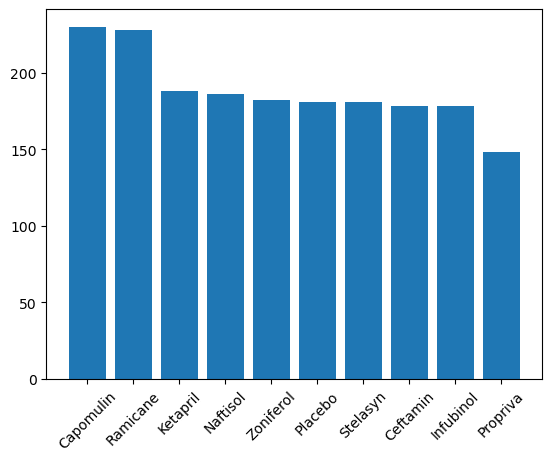

In [357]:
plt.bar(m_count.keys(),m_count)
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

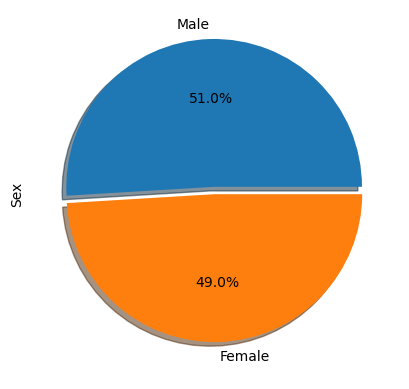

In [358]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_data.Sex.value_counts().plot.pie(autopct='%.1f%%', ylabel = 'Sex', explode = [.05,0], shadow = True)

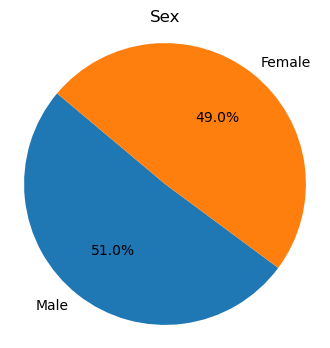

In [360]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pf = clean_mouse_data['Sex'].value_counts()
plt.figure(figsize=(4, 4))  
plt.pie(gender_pf, labels=gender_pf.index, autopct='%1.1f%%', startangle=140)  # Create thl pie chart
plt.title("Sex")  # Tittle
plt.axis('equal')  # Proporciona un círculo perfecto
plt.show()


## Quartiles, Outliers and Boxplots

In [361]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time = clean_mouse_data.groupby('Mouse ID').Timepoint.max().reset_index().merge(clean_mouse_data, on=['Mouse ID','Timepoint'])
max_time.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [362]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
   tumor = max_time[max_time['Drug Regimen']==drug]['Tumor Volume (mm3)']

# tumor_data = [max_time[max_time['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in drugs]
  
   iqr = tumor.quantile(.75) - tumor.quantile(.25)
   lower = tumor.quantile(.25) - iqr*1.5
   upper = tumor.quantile(.75) + iqr*1.5

   # Locate the rows which contain mice on each drug and get the tumor volumes
   # add subset 
   
   tumor_data.append(tumor)
   
# Determine outliers using upper and lower bounds
   print(f"{drug}'s potentical outlayers: {tumor[(tumor<=lower)|(tumor>=upper)]}")

Capomulin's potentical outlayers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potentical outlayers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potentical outlayers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potentical outlayers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Tumor by Trearment')

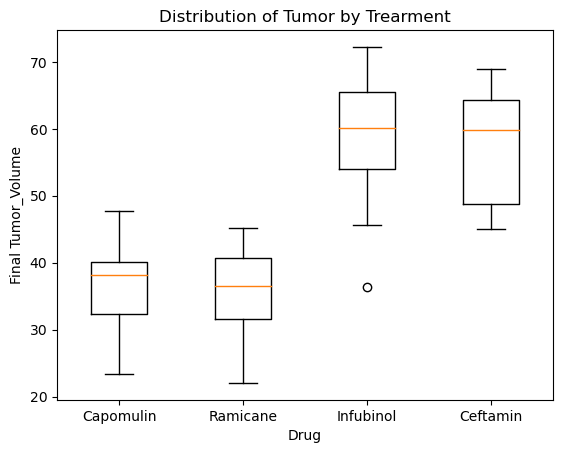

In [368]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=drugs)
# Etiquetas y título
plt.xlabel('Drug')
plt.ylabel('Final Tumor_Volume')
plt.title('Distribution of Tumor by Trearment')

## Line and Scatter Plots

In [364]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Data Frame with Capomulin 
capomulin_df = clean_mouse_data.loc[(clean_mouse_data["Drug Regimen"] == "Capomulin") & (clean_mouse_data["Mouse ID"] == "l509")]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


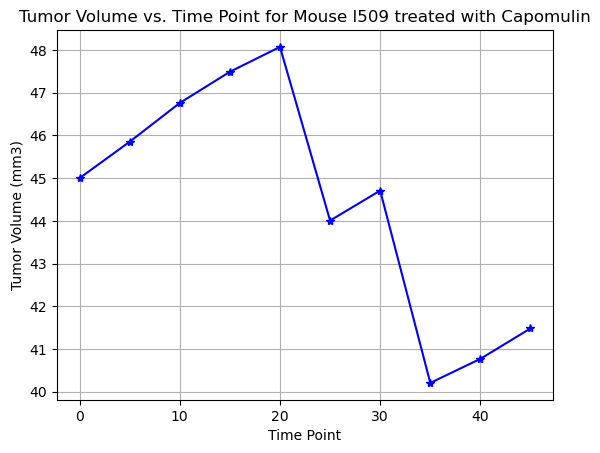

In [365]:
#Plot
plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'], marker='*', color='b', linestyle='-', markersize=6)
plt.title("Tumor Volume vs. Time Point for Mouse l509 treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()


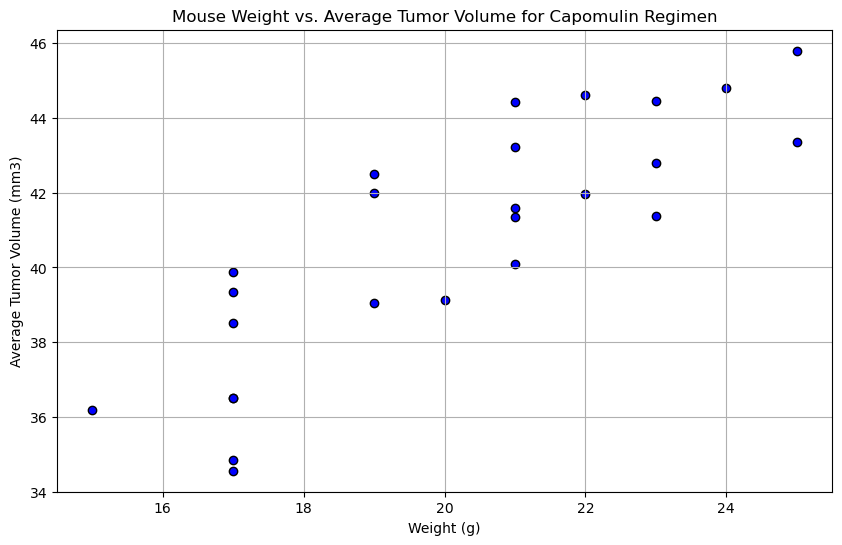

In [366]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
all_capomulin = clean_mouse_data[clean_mouse_data["Drug Regimen"] == 'Capomulin']
avg_vol_df = all_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = all_capomulin.groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_vol_df, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

## Correlation and Regression

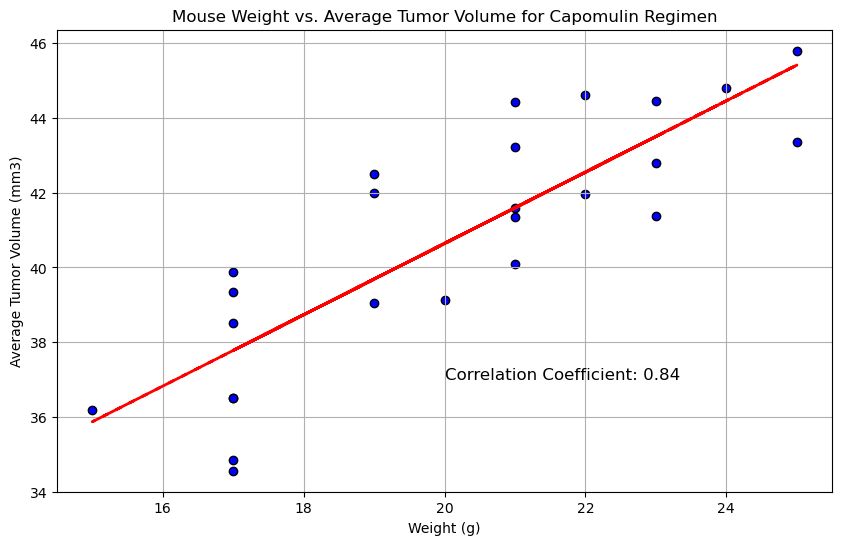

In [367]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
all_capomulin = clean_mouse_data[clean_mouse_data["Drug Regimen"] == 'Capomulin']
avg_vol_df = all_capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = all_capomulin.groupby('Mouse ID')['Weight (g)'].mean()
# Calculate the correlation coefficient
correlation_coefficient = avg_vol_df.corr(mouse_weights)
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_vol_df)
#creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_vol_df, marker='o', facecolors='blue', edgecolors='black')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#adding the line 
plt.plot(mouse_weights, intercept + slope * mouse_weights, color='red', linestyle='dashed', linewidth=2)
# Display the correlation coefficient on the plot
plt.text(20, 37, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='black')

plt.grid(True)

# Show the plot
plt.show()

